# In this block of code required liberary for ploting and resampling is imported.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,RFE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
encode = LabelEncoder()
sme = SMOTE()
pca = PCA()

# Driver Code

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link='https://drive.google.com/open?id=1hdavpx6TNFMm_5unP66Wxkls_sX4Xgyh'
link2 = 'https://drive.google.com/open?id=1hkwXBcF9aVdGTBSVWORIEN131QqZnXBL'
#train data link
fluff, id = link.split('=')
fluff,id1 = link2.split('=')
print (id) # Verify that you have everything after '='
print(id1)
#train data
downloaded = drive.CreateFile({'id':id}) 
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('train_aero.csv')
downloaded1.GetContentFile('test_aero.csv')  
data = pd.read_csv('train_aero.csv')
test = pd.read_csv('test_aero.csv')
# Dataset is now stored in a Panda

1hdavpx6TNFMm_5unP66Wxkls_sX4Xgyh
1hkwXBcF9aVdGTBSVWORIEN131QqZnXBL


# Label for our Model
# L1: Significant_Damage_And_Serious_Injuries
# L2: Significant_Damage_And_Fatalities
# L3: Minor_Damage_And_Injuries
# L4: Highly_Fatal_And_Damaging


In [0]:
Y = data['Severity']
Y.shape

(10000,)

# Data for our Model

In [0]:
X = data.iloc[:,1:12]

# This is our correlation heat map which shows the dependency of each feature with it neighbouring features.

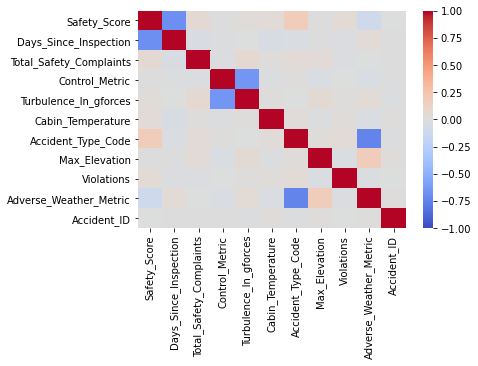

In [0]:
sns.heatmap(data.corr(),vmin=-1, vmax=1, center=0,cmap= 'coolwarm')

# In this section of code we have scaled our data upto a certain range.

In [0]:
X['Safety_Score'] = MinMaxScaler(feature_range=(0,100)).fit_transform(X[['Safety_Score']])
X['Days_Since_Inspection'] = MinMaxScaler(feature_range=(1,23)).fit_transform(X[['Days_Since_Inspection']])
X['Total_Safety_Complaints'] = MinMaxScaler(feature_range=(0,54)).fit_transform(X[['Total_Safety_Complaints']])
X['Control_Metric'] = MinMaxScaler(feature_range=(0,100)).fit_transform(X[['Control_Metric']])

X['Turbulence_In_gforces'] = MinMaxScaler(feature_range=(0.13,0.88)).fit_transform(X[['Turbulence_In_gforces']])
X['Cabin_Temperature'] = MinMaxScaler(feature_range=(74.74,97.51)).fit_transform(X[['Cabin_Temperature']])
X['Accident_Type_Code'] = MinMaxScaler(feature_range=(1,7)).fit_transform(X[['Accident_Type_Code']])
X['Max_Elevation'] = MinMaxScaler(feature_range=(800,6000)).fit_transform(X[['Max_Elevation']])
X['Violations'] = MinMaxScaler(feature_range=(0,5)).fit_transform(X[['Violations']])
X['Adverse_Weather_Metric'] = MinMaxScaler(feature_range=(0,2.3)).fit_transform(X[['Adverse_Weather_Metric']])

# In this block of code I have transformed our label from string to number so that it can become easy for our model to predict 

In [0]:
label = encode.fit_transform(Y)

(10000,)

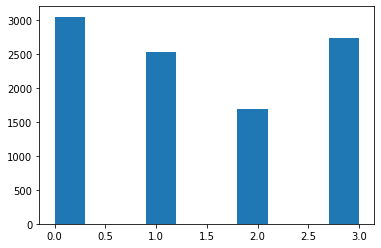

In [0]:
plt.hist(label)
plt.show()

# Here I have imported all the liberary that is relevant for model preperation and then after all these process ensembling technique is used to train model.  

In [0]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split as tts
from sklearn.impute import SimpleImputer

In [0]:
X.shape,label.shape
label = np.array(label)

In [0]:
xtrain,xtest,ytrain,ytest=tts(X,label,test_size=0.3,random_state=0)
set(ytest)

{0, 1, 2, 3}

In [0]:
ens=[] #my ensemble

In [0]:
ens.append(('rfc',RandomForestClassifier(n_estimators=100)))
ens.append(('svc',SVC(kernel='rbf',gamma='auto',probability=True)))
ens.append(('ext',ExtraTreesClassifier(n_estimators=100)))

In [0]:
clf = VotingClassifier(ens,voting='hard',weights=[300,600,900])

In [0]:
clf.fit(xtrain,ytrain)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [0]:
clf.score(xtrain,ytrain)

1.0

In [0]:
pred=clf.predict(xtest)


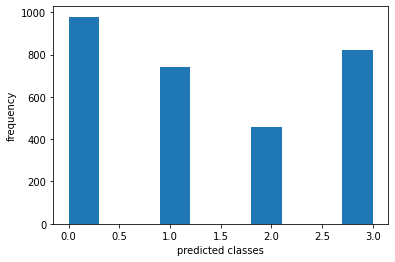

In [0]:
plt.xlabel("predicted classes")
plt.ylabel("frequency")
plt.hist(pred)
plt.show()

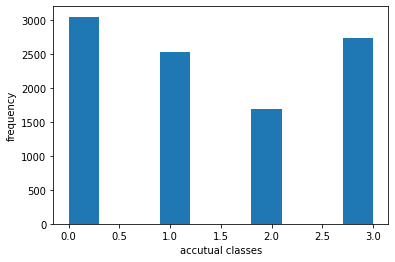

In [0]:
plt.xlabel("accutual classes")
plt.ylabel("frequency")
plt.hist(label)
plt.show()

In [0]:
accuracy_score(ytest,pred)

0.875

In [0]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       905
           1       0.86      0.84      0.85       758
           2       0.88      0.82      0.85       494
           3       0.89      0.86      0.88       843

    accuracy                           0.88      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.88      0.87      3000



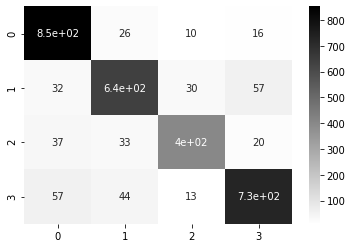

In [0]:
cf_matrix=confusion_matrix(ytest,pred)
sns.heatmap(cf_matrix,annot=True,cmap='binary')